## RSA (cryptosystem) Toolbox

Mohammed Alsailani


<hr />

# Table of Contents

### 1. Introduction

### 2. RSA Code Package 
###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Basic tool set
###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 First tool set
###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Second tool set

### 3. RSA More Code

###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Encode
###### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Decode

### 4. Demo

### 5. How to break codes 

### 6. Multithreading code breaking code








### 1. Introduction

In this notebook, we provide step by step how to build an RSA package for encrypting and decrypting messages. 

RSA is considered asymmetric encryption, where we have public and private keys. The private keys are used to decrypt messages while public keys are used to encrypt messages. RSA was called after its inventors  (Rivest–Shamir–Adleman).

You can share with others your public RSA key if it is secure enough. They can encrypt any messages for you, and you can use your private key to decrypt messages.


### 2.1
#### Basic tool set


In [1]:
def Convert_Text(_string):
    #define empty list then convert every character in the input to ascii and append it to integer_list 
    #then retun the ascii list
    integer_list = []
    for i in _string: 
        integer_list.append(ord(i))
    return integer_list
#test code
assert Convert_Text("hello")==[104, 101, 108, 108, 111], 'Incorrect result' 
print("Q.E.D")

Q.E.D


In [2]:
def Convert_Num(_list):
    #define empty string 
    #convert every ascii integer in the input to string and add it the end of the sting
    #then return the text string.
    _string = ''
    for i in _list: 
        _string += chr(i)
    return _string


#test code
assert Convert_Num([104, 101, 108, 108, 111]) == 'hello', 'Incorrect result'
print("Q.E.D")

Q.E.D


In [3]:
def Convert_Binary_String(_int):

    bits="" #empty sting to store results
    
    #while int >  0, add the remainder to results string and update the input by doing integer division by two
    while (_int > 0):  
        sigDig = _int % 2
        _int=_int // 2
        
        bits=bits+str(sigDig)
        
    
    bits = bits[::-1] # flip order of list
    
    return bits

#test code
assert Convert_Binary_String(345) == "101011001", 'Incorrect result'
print("Q.E.D")

Q.E.D


### 2.2 
#### First tool set.



In [4]:
def FME(b, n, m):

    
    #initialize the result to 1 and start with b then repeatdly square
    result = 1 
    square=b 
        
    while (n>0): #loop to convert to binary, stop when quotient is 0,get the least sig. bit in order and update the quotient
        k = n % 2 
        n= n//2 
        if k == 1:  #if bit is 1, update results
            result = (result * square) % m
        square = (square * square) % m #repeatedly square b and find remainder
        
    return result



assert FME(4,13,497) == 445, 'Incorrect result'
print("Q.E.D")

Q.E.D


In [5]:
def Euclidean_Alg(a, b):

    while (b>0): # continue while the divisor is not zero.
    
        #Get quotient and remainder
        k = a % b
        q = a//b
        
        #update number a to divisor and b to remainder.
        a=b
        b=k
        
    return a #return GCD, a when b is zero


#check
assert Euclidean_Alg(26,91) == 13, 'Incorrect result'
print("Q.E.D")


Q.E.D


### 2.3
#### Second tool set



In [6]:
import random
def Find_Public_Key_e(p, q):
    
    #get n
    n = p * q
    
    #warning if n is smaller than 150
    if n<150:
        print("Warning, n is smaller than 150, can't convert all ascii")
    
    #fine e
    #try max 1000 times until you find e
    # e is relativeley prime to (p-1)*(q-1) but not equal to p or q
    #keep seeding random e from 11 to 1500
    #if the condition found return e
    
    for i in range(1000):
        e=random.randrange(11, n)
        if ( (Euclidean_Alg(e, (p-1)*(q-1) ) == 1) and not(e==p or e==q) ):
            return(e,n)
    print("key can't be found after 1000 tries")

#unfortunetly, can't create assert to check the code against a case because it create random e    

In [7]:
def extended_gcd(m,n):
    
    (s1,t1)=(1,0) #initalize Bezout Coefficents 
    (s2,t2)=(0,1)
    
    while (n>0): # continue while the divisor is not zero.
    
        #Update GCM
        k = m % n
        q = m//n
        
        m=n
        n=k
        
        #update Bezout Coefficents 
        (s1_hat,t1_hat)=(s2,t2)
        (s2_hat,t2_hat)=(s1-q*s2,t1-q*t2)
         
        
        (s1,t1)=(s1_hat,t1_hat)
        (s2,t2)= (s2_hat,t2_hat)
        
    return m, s1, t1 #return GCD and Bezout Coefficents


#check
assert extended_gcd(26,91) == (13,-3,1), 'Incorrect result'
print("Q.E.D")



Q.E.D


In [8]:
def Find_Private_Key_d(e, p, q):

    
    #calculate n
    n=p*q
    
    
    #get the inverse which the Bezouts coefficents s1.
    d=extended_gcd(e,(p-1)*(q-1))[1]
    
    #if inverse is negative add (p-1)*(q-1) until it becomes posotive
    while d < 0:
        d = d + ( (p-1)*(q-1) )
        
    
    return (d,n)



### 3.
#### Putting things all together.



In [9]:
def Encode(n, e, message):

    
    #convert message to ascii
    message_bin=Convert_Text(message)

    #initialize empty list for the cipher text
    cipher_text = []
    
    #for every bin in message encrypt using mapping
    for i in message_bin:
        cipher_text.append(FME(i,e,n))
    
    #return cipher text
    return cipher_text


#check code
assert Encode(5251, 3, "Hello Earth")==[427, 1105, 4723, 4723, 2371, 1262, 2947, 4250, 762, 1349, 1150], "Incorrect results"
print("Q.E.D")

Q.E.D


In [10]:
def Decode(n, d, cipher_text):
    
    message = ''
    
    message_num=[]
    
    #mapping use the fast modular exponentiation algorithm to decrypt
    for i in cipher_text:
        message_num.append(FME(i,d,n))
    
    #convert from ascii to english letter
    message=Convert_Num(message_num)
    
    return message

#check code
assert Decode(5251, 3403, [427, 1105, 4723, 4723, 2371, 1262, 2947, 4250, 762, 1349, 1150])=='Hello Earth', "Incorrect"
print("Q.E.D")

Q.E.D


### 4.  Demo 


##### Generatign keys

The process of generating keys start first by finding p and q that are prime. In addition, the multipicaltion of p and q should be greater 150 to avoid issues with ASCII.

The Find_Public_Key_e(p,q) and Find_Private_Key_d(e, p, q) function will generate the keys for you. Be carefull that the private key functions uses the e output from the public key function.

In the example below p=43 and q=59.
it returns public key (e, n) 
and the private key (d, n) 

In [11]:
#provide prime p and q that are prime
p=43
q=59

#generate public key
e,n = Find_Public_Key_e(p, q)

#print public key
print("Public key")
print("e:", e)
print("n:", n,"\n")

#generate private key
d,n= Find_Private_Key_d(e, p, q)

#print private key
print("Private key")
print("d:", d)
print("n:", n)



Public key
e: 433
n: 2537 

Private key
d: 1609
n: 2537


#### Encode and decode the same message


In [12]:
#define p and q that are ptime
p=43
q=59

#generate public key
e,n = Find_Public_Key_e(p, q)

#print public key
print("Public key")
print("e:", e)
print("n:", n, "\n")

#generate private key
d,n= Find_Private_Key_d(e, p, q)

#print private key
print("Private key")
print("d:", d)
print("n:", n, "\n")

# message we want to encrypt
Message= "Hello World" 

#print oginal message
print("Origianl message:", Message, "\n")


#Encoded message and print it:
cipher_text=Encode(n,e,Message)
print("Encoded message:", cipher_text, "\n")  


# decode message back and print it
decoded_massage= Decode(n,d,cipher_text) 
print("Decoded message:", decoded_massage, "\n")



#double check decoded_massage is the same as the orignal  message
assert decoded_massage == Message

print("Q.E.D.") #Q.E.D.


Public key
e: 1243
n: 2537 

Private key
d: 2095
n: 2537 

Origianl message: Hello World 

Encoded message: [2348, 1906, 352, 352, 2206, 925, 2409, 2206, 115, 352, 1479] 

Decoded message: Hello World 

Q.E.D.


### 5. How to Break Code. 









In [13]:
#build a brute force factorization function to break codes based on the Pseudocode provided above

import time

def factorize(n):

    st = time.time() #set start time

    # n is a number, return the smallest factor of n
    for i in range(2,n): #search factors from 2 to n
        if n % i==0: #if factor is found
            et = time.time() #end time
            elapsed_time = et - st
            return (i,n//i,elapsed_time) #if factor is found return p, q, and computational time
        
    
    #if factor is not found
    et = time.time() #end time
    elapsed_time = et - st
    return (False,elapsed_time) #if prime and can't find a factor return false.


assert ( (factorize(4)[0] == 2) and (factorize(4)[1] == 2) ), "something wrong" # making sure nothing silly


### 6. Multi threading brute force algorithm for breaking code##



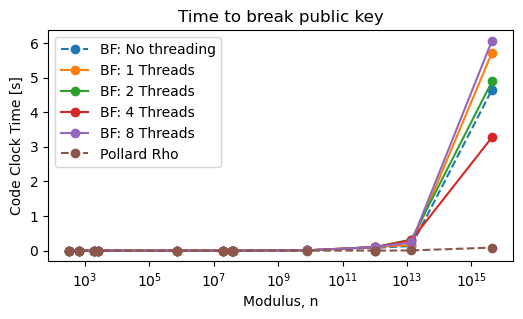

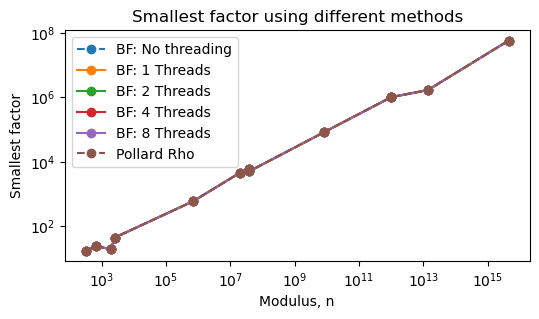

In [14]:

#import libraries
import time
import random
import math
import threading
import matplotlib.pyplot as plt    


#brute force algorithm, no threading
#modified from the Pseudocode provided above
def bf_factorize(n):
    """
    Brute force factorization method
    The input is an integer, n.
    If n is not prime, it will return factors of n and elapsed time to calculate n. 
    If n is prime, it will return false, and elapased time to figure n is prime.
    
    """
    st = time.time() #set start time

    # n is a number, return the smallest factor of n
    #search factors from 2 to n
    for i in range(2,n): 
        if n % i==0: #if factor is found
            et = time.time() #end time
            elapsed_time = et - st
            return (i,n//i,elapsed_time) #if factor is found return p, q, and computational time
        
    
    #if factor is not found
    et = time.time() #end time
    elapsed_time = et - st
    return (False,elapsed_time) #if prime and can't find a factor return false.



#reuse FME function we built above as it is needed for the PollardRho function
def FME(b, n, m):
    #initialize the result to 1 and start with b then repeatdly square
    result = 1 
    square=b 
        
    while (n>0): #loop to convert to binary, stop when quotient is 0,get the least sig. bit in order and update the quotient
        k = n % 2 
        n= n//2 
        if k == 1:  #if bit is 1, update results
            result = (result * square) % m
        square = (square * square) % m #repeatedly square b and find remainder 
    return result
 
    
# Polland Rho Function modified from geeksforgeeks
#https://www.geeksforgeeks.org/pollards-rho-algorithm-prime-factorization/
#Note, I am only analyzing the code here for fun.
#I added small time function inside
def PollardRho( n):
    st = time.time() #set start time

 
    # no prime divisor for 1
    if (n == 1):
        et = time.time() #end time
        elapsed_time = et - st   
        return n,elapsed_time
 
    # even number means one of the divisors is 2
    if (n % 2 == 0):
        et = time.time() #end time
        elapsed_time = et - st   
        return 2,elapsed_time
 
    # we will pick from the range [2, N)
    x = (random.randint(0, 2) % (n - 2))
    y = x
 
    # the constant in f(x).
    # Algorithm can be re-run with a different c
    # if it throws failure for a composite.
    c = (random.randint(0, 1) % (n - 1))
 
    # Initialize candidate divisor (or result)
    d = 1
 
    # until the prime factor isn't obtained.
    # If n is prime, return n
    while (d == 1):
     
        # Tortoise Move: x(i+1) = f(x(i))
        x = (FME(x, 2, n) + c + n)%n
 
        # Hare Move: y(i+1) = f(f(y(i)))
        y = (FME(y, 2, n) + c + n)%n
        y = (FME(y, 2, n) + c + n)%n
 
        # check gcd of |x-y| and n
        d = math.gcd(abs(x - y), n)
 
        # retry if the algorithm fails to find prime factor
        # with chosen x and c
        if (d == n):
            return PollardRho(n)
    
    et = time.time() #end time
    elapsed_time = et - st    
     
    return d,elapsed_time


#brute force function used my the multi threading function
def bf_plus_factorize(n,start,end):
    """
    This is a brute force factorization function
    It search for factor within the start and end range you provide
    

    Parameters
    ----------
    n : int
        number you want to factorize.
    start : int
        start of seach.
    end : int
        end of search.

    Returns
    -------
    None. This function only update the global variable listOfFactors and factor_found if needed

    """
    global factor_found #global variable, if factor is found, true if found, false if now
    global listOfFactors #stores factors in this global list
    
    #don't start search with zero or 1, because they are always factors. So correct search start if needed
    if (start==0 or start==2):  
        start=2
        
        
    # n is a number, return the smallest factor of n
    #search factors from start to end (inclusive)
    for i in range(start,end+1): 
        
        if factor_found==True:  #if factor is found in any of the threads stop.
            return;   
            
         #if factor is found, append it to the gloabl variable listOfFactors, 
         #update factor_found to True to stop all other threads
         #return the function
        if n % i==0:
            listOfFactors.append(i)
            listOfFactors.append(n//i)
            factor_found=True
            return
        

#here comes the fun part.
#all code below is written by myself.
#I have not looked at any threading function for facorization online. So no idea what is online.

def bf_threading_factorize(n,no_threads):
    """
    This is multi threading factorization function.
    It split the number you want to factorize into different search segments. Then run brute force algorithm for every search segment
    

    Parameters
    ----------
    n : int
        integer you want to factorize.
    no_threads : int
        number of threads you like to perform.

    Returns
    -------
    listOfFactors : List
        List contains two factors.
    elapsed_time : float
        compuational time for the code.

    """
    
    st = time.time() #set start time
    
    global factor_found #global variable to store status if factor is found, true or false
    global listOfFactors #lobal variable to store factors
    
    listOfFactors=[] #list of factors
    factor_found=False #initialize factor_found to false. If true stop running the code.


    threads=[] #list stores every thread job needed for the join method so we don't return our function early
    
    sqrt_n=math.ceil(n**(0.5))+1 # we only need to search up to sqrt(n), theorem 2 in the book.

    step_size=math.ceil(sqrt_n/no_threads) #step size for seach segments.
    
    
    #create segments or parition for searching for factors using bf_plus_factorize function.
    #nunber of partaiton is equal to number of threads
    for thread in range(no_threads):
        t=threading.Thread(target=bf_plus_factorize, args=((n,int(thread*step_size), int(thread*step_size + step_size-1))) )
        t.start()
        threads.append(t)
    
    #don't exit this for loop until you complete running all threads    
    for thread in threads:
        thread.join()
    
    #calculate computational time    
    et = time.time() #end time
    elapsed_time = et - st
    
    
    return (listOfFactors,elapsed_time)
        


# main function
if __name__ == "__main__":
 
    #lets start the fun part here!
    
    #We will analyze the brute force, mutli threading brute force, and Pollard Rho method for factoring numbers. 
    
    #random random modulo numbers with increasing significant digits from Piazza, last one I added it.
    modulo_numbers=[323, 667, 1957, 2537, 712031, 19307227, 36904181, 39455893, 8099370991, 999478010521, 999962000357, 13751264097121,4415945413502687]
    
    
    #we fist analyze the number of threads vs computational time fo the mutli threading brute force function
    
    #store computational time of the different methods in lists
    zero_threads_time=[]
    one_threads_time=[]
    two_threads_time=[]
    four_threads_time=[]
    eight_threads_time=[]
    PollardRho_threads_time=[]
    
    
    #store smallest factor of the different methods in lists
    zero_threads_s_factor=[]
    one_threads_s_factor=[]
    two_threads_s_factor=[]
    four_threads_s_factor=[]
    eight_threads_s_factor=[]
    PollardRho_threads_s_factor=[]
    
    
    #run every method for every number in the modulo numbers list, store the computational time and smallest factor
    for mod in modulo_numbers:
        zero=bf_factorize(mod)
        zero_threads_time.append(zero[2]) #store computatioanl time
        zero_threads_s_factor.append(min(zero[0],zero[1])) #store smallest factor
        
        one=bf_threading_factorize(mod,1)
        one_threads_time.append(one[1])
        one_threads_s_factor.append(min(one[0][0],one[0][1]))
        
        two=bf_threading_factorize(mod,2)        
        two_threads_time.append(two[1])
        two_threads_s_factor.append(min(two[0][0],two[0][1]))
    
        four=bf_threading_factorize(mod,4) 
        four_threads_time.append(four[1])
        four_threads_s_factor.append(min(four[0][0],two[0][1]))
        
        
        eight=bf_threading_factorize(mod,8) 
        eight_threads_time.append(eight[1])
        eight_threads_s_factor.append(min(eight[0][0],eight[0][1]))

        Pollard=PollardRho(mod)
        PollardRho_threads_time.append(Pollard[1])
        PollardRho_threads_s_factor.append(min(Pollard[0],mod//Pollard[0]))

   
    #plot computational time results
    plt.figure(figsize=(6, 3))
    plt.plot(modulo_numbers,zero_threads_time,"--o",label="BF: No threading")
    plt.plot(modulo_numbers,one_threads_time,"-o",label="BF: 1 Threads")
    plt.plot(modulo_numbers,two_threads_time,"-o",label="BF: 2 Threads")
    plt.plot(modulo_numbers,four_threads_time,"-o",label="BF: 4 Threads")
    plt.plot(modulo_numbers,eight_threads_time,"-o",label="BF: 8 Threads")
    plt.plot(modulo_numbers,PollardRho_threads_time,"--o",label="Pollard Rho")
    plt.xscale("log")
    plt.legend()
    plt.xlabel('Modulus, n')
    plt.title("Time to break public key")
    plt.ylabel('Code Clock Time [s]')
    plt.show()     
    
    #plot smallest factor found results
    plt.figure(figsize=(6, 3))
    plt.plot(modulo_numbers,zero_threads_s_factor,"--o",label="BF: No threading")
    plt.plot(modulo_numbers,one_threads_s_factor,"-o",label="BF: 1 Threads")
    plt.plot(modulo_numbers,two_threads_s_factor,"-o",label="BF: 2 Threads")
    plt.plot(modulo_numbers,four_threads_s_factor,"-o",label="BF: 4 Threads")
    plt.plot(modulo_numbers,eight_threads_s_factor,"-o",label="BF: 8 Threads")
    plt.plot(modulo_numbers,PollardRho_threads_s_factor,"--o",label="Pollard Rho")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.xlabel('Modulus, n')
    plt.title("Smallest factor using different methods")
    plt.ylabel('Smallest factor')
    plt.show()     
